# <h1>Citibike Network Analysis</h1>
## <p>This notebook analyzes Citibike trip data from September 2018 to understand network characteristics.</p>
# Table of Contents
- [Citibike Network Analysis](#citibike-network-analysis)
  - [Import Libraries](#import-libraries)
  - [Load Data](#load-data)
  - [Data Cleaning](#data-cleaning)
  - [Graph Creation](#graph-creation)
  - [Analysis Functions](#analysis-functions)
  - [Network Analysis](#network-analysis)
  - [Visualizations](#visualizations)
  - [Conclusion](#conclusion)


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


# Load Data

In [2]:
def load_data(file_path):
    """Load Citibike trip data from a CSV file."""
    return pd.read_csv(file_path)

datafile = "201801-citibike-tripdata.csv"
df = load_data(datafile)

# Data Cleaning

In [3]:
def clean_data(df):
    """Clean the Citibike data."""
    df = df.dropna(axis=0, how='any')
    df['start station id'] = df['start station id'].astype(str)
    df['end station id'] = df['end station id'].astype(str)
    return df

df = clean_data(df)

# Graph Creation

In [4]:
def get_citibike_graph(df):
    """
    Create a graph from Citibike trip data.

    Returns:
    G -- networkx.Graph object
    node_names -- dictionary with station ids as keys and station names as values
    """
    G = nx.Graph()
    node_names = {}
    edge_data = {}

    for _, row in df.iterrows():
        start_station_id = row['start station id']
        end_station_id = row['end station id']
        edge = (start_station_id, end_station_id)

        if edge not in edge_data:
            edge_data[edge] = [row['tripduration']]
        else:
            edge_data[edge].append(row['tripduration'])

        if start_station_id not in node_names:
            node_names[start_station_id] = row['start station name']
        if end_station_id not in node_names:
            node_names[end_station_id] = row['end station name']

    for edge, data in edge_data.items():
        G.add_edge(edge[0], edge[1], count=len(data), average=np.mean(data))
    
    return G, node_names

In [5]:
G, nodes = get_citibike_graph(df)
m_df = df[df['gender'] == 1]
f_df = df[df['gender'] == 2]
m_G, m_nodes = get_citibike_graph(m_df)
f_G, f_nodes = get_citibike_graph(f_df)

# Analysis Functions

In [6]:
def get_busiest_station(graph, node_names):
    """Return the station with the highest degree."""
    busiest_station_id = max(graph.degree, key=lambda x: x[1])[0]
    return node_names[busiest_station_id], graph.degree[busiest_station_id]

def get_longest_trip(graph, node_names):
    """Return the pair of stations with the longest average trip duration."""
    longest_trip = max(graph.edges(data=True), key=lambda x: x[2]['average'])
    return node_names[longest_trip[0]], node_names[longest_trip[1]], longest_trip[2]['average'] / 60  # convert to minutes

def get_most_trips(graph, node_names):
    """Return the pair of stations with the highest number of trips."""
    most_trips = max(graph.edges(data=True), key=lambda x: x[2]['count'])
    return node_names[most_trips[0]], node_names[most_trips[1]], most_trips[2]['count']

def get_most_central_station(graph, node_names):
    """Return the most central station based on closeness centrality."""
    centrality = nx.closeness_centrality(graph)
    central_station_id = max(centrality, key=centrality.get)
    return node_names[central_station_id], centrality[central_station_id]

def get_bottleneck_node(graph, node_names):
    """Return the bottleneck node based on betweenness centrality."""
    betweenness = nx.betweenness_centrality(graph)
    bottleneck_node_id = max(betweenness, key=betweenness.get)
    return node_names[bottleneck_node_id], betweenness[bottleneck_node_id]

# Network Analysis

In [7]:
busiest_station_name, busiest_station_degree = get_busiest_station(G, nodes)
busiest_station_name_m, busiest_station_degree_m = get_busiest_station(m_G, m_nodes)
busiest_station_name_f, busiest_station_degree_f = get_busiest_station(f_G, f_nodes)

longest_trip_start, longest_trip_end, longest_trip_duration = get_longest_trip(G, nodes)
longest_trip_start_m, longest_trip_end_m, longest_trip_duration_m = get_longest_trip(m_G, m_nodes)
longest_trip_start_f, longest_trip_end_f, longest_trip_duration_f = get_longest_trip(f_G, f_nodes)

most_trips_start, most_trips_end, most_trips_count = get_most_trips(G, nodes)
most_trips_start_m, most_trips_end_m, most_trips_count_m = get_most_trips(m_G, m_nodes)
most_trips_start_f, most_trips_end_f, most_trips_count_f = get_most_trips(f_G, f_nodes)

central_station, centrality = get_most_central_station(G, nodes)
bottleneck_node, betweenness = get_bottleneck_node(G, nodes)

In [ ]:
print(f"Busiest station (all): {busiest_station_name} ({busiest_station_degree} trips)")
print(f"Busiest station (male): {busiest_station_name_m} ({busiest_station_degree_m} trips)")
print(f"Busiest station (female): {busiest_station_name_f} ({busiest_station_degree_f} trips)")

print(f"Longest trip (all): {longest_trip_start} to {longest_trip_end} ({longest_trip_duration:.2f} minutes)")
print(f"Longest trip (male): {longest_trip_start_m} to {longest_trip_end_m} ({longest_trip_duration_m:.2f} minutes)")
print(f"Longest trip (female): {longest_trip_start_f} to {longest_trip_end_f} ({longest_trip_duration_f:.2f} minutes)")

print(f"Most trips (all): {most_trips_start} to {most_trips_end} ({most_trips_count} trips)")
print(f"Most trips (male): {most_trips_start_m} to {most_trips_end_m} ({most_trips_count_m} trips)")
print(f"Most trips (female): {most_trips_start_f} to {most_trips_end_f} ({most_trips_count_f} trips)")

print(f"Most central station (all): {central_station} ({centrality:.2f})")
print(f"Bottleneck node (all): {bottleneck_node} ({betweenness:.2f})")


Busiest station (all): Pershing Square North (433 trips)
Busiest station (male): Pershing Square North (413 trips)
Busiest station (female): Pershing Square North (266 trips)
Longest trip (all): Nassau St & Navy St to Hope St & Union Ave (325167.48 minutes)
Longest trip (male): Nassau St & Navy St to Hope St & Union Ave (325167.48 minutes)
Longest trip (female): Adelphi St & Myrtle Ave to NYCBS Depot - 3AV (73698.82 minutes)
Most trips (all): Pershing Square North to Broadway & W 32 St (326 trips)
Most trips (male): Pershing Square North to Broadway & W 32 St (310 trips)
Most trips (female): Adelphi St & Myrtle Ave to Willoughby St & Fleet St (87 trips)
Most central station (all): Pershing Square North (0.69)
Bottleneck node (all): 1 Ave & E 62 St (0.01)


# Visualizations

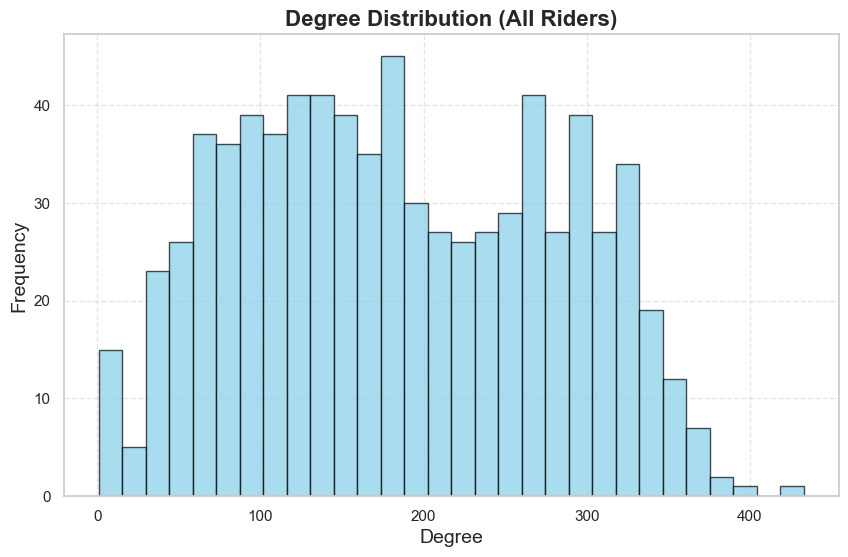

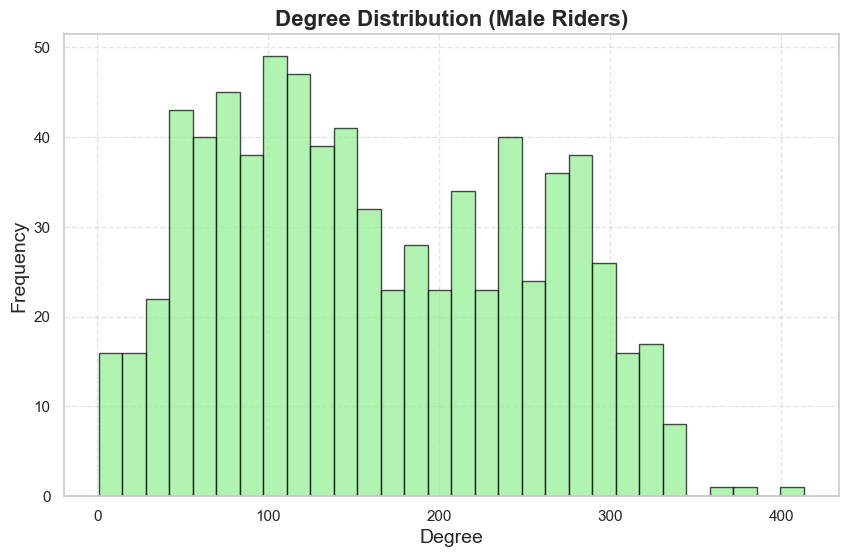

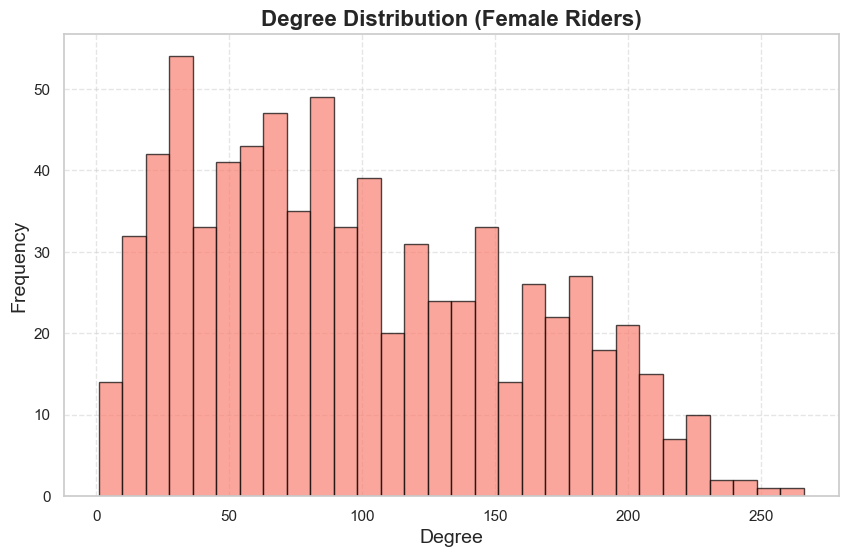

In [ ]:
def plot_degree_distribution(graph, title, color):
    degrees = [d for n, d in graph.degree()]
    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=30, color=color, edgecolor='black', alpha=0.7)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Degree', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

plot_degree_distribution(G, 'Degree Distribution (All Riders)', 'skyblue')
plot_degree_distribution(m_G, 'Degree Distribution (Male Riders)', 'lightgreen')
plot_degree_distribution(f_G, 'Degree Distribution (Female Riders)', 'salmon')


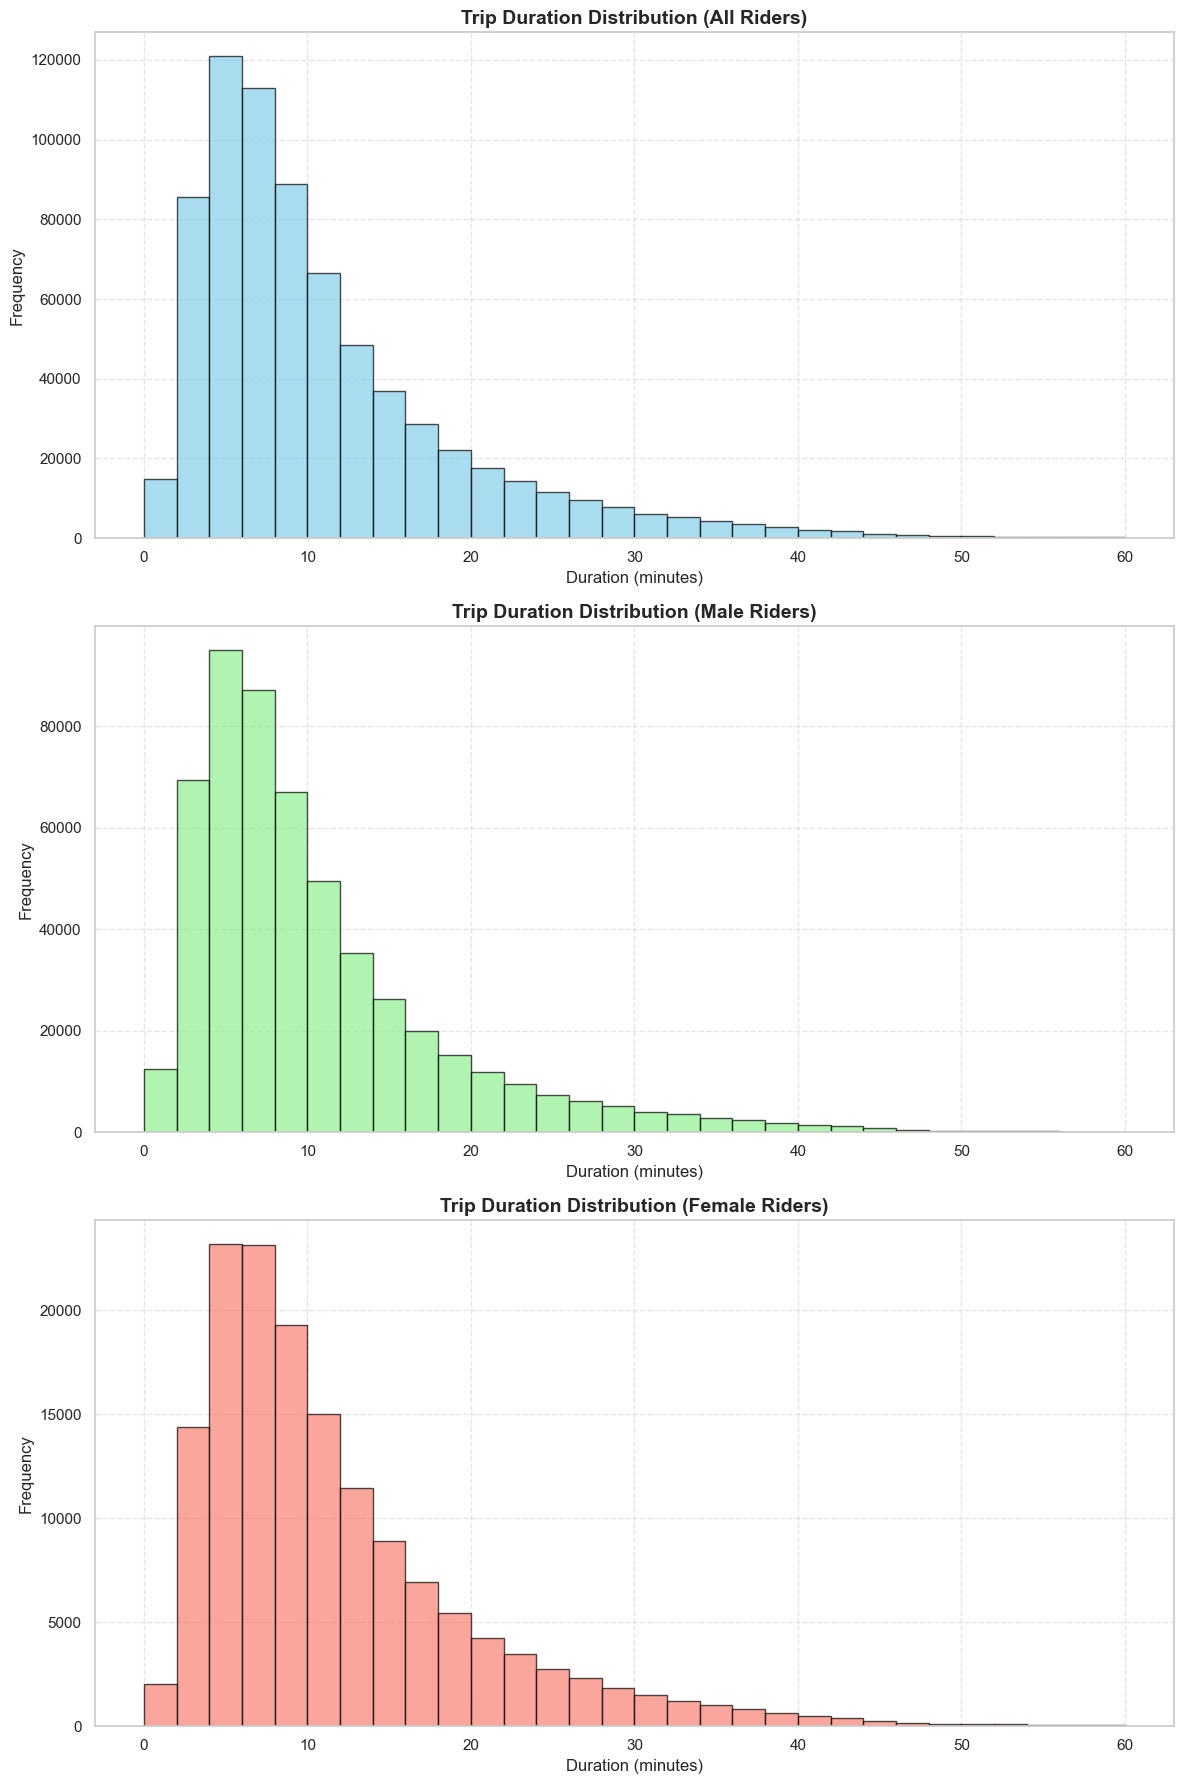

In [ ]:
def plot_trip_duration_distribution(df, title, color, ax):
    durations = df['tripduration'] / 60
    ax.hist(durations, bins=30, range=(0, 60), color=color, edgecolor='black', alpha=0.7)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Duration (minutes)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

plot_trip_duration_distribution(df, 'Trip Duration Distribution (All Riders)', 'skyblue', axes[0])
plot_trip_duration_distribution(m_df, 'Trip Duration Distribution (Male Riders)', 'lightgreen', axes[1])
plot_trip_duration_distribution(f_df, 'Trip Duration Distribution (Female Riders)', 'salmon', axes[2])

plt.tight_layout()
plt.show()


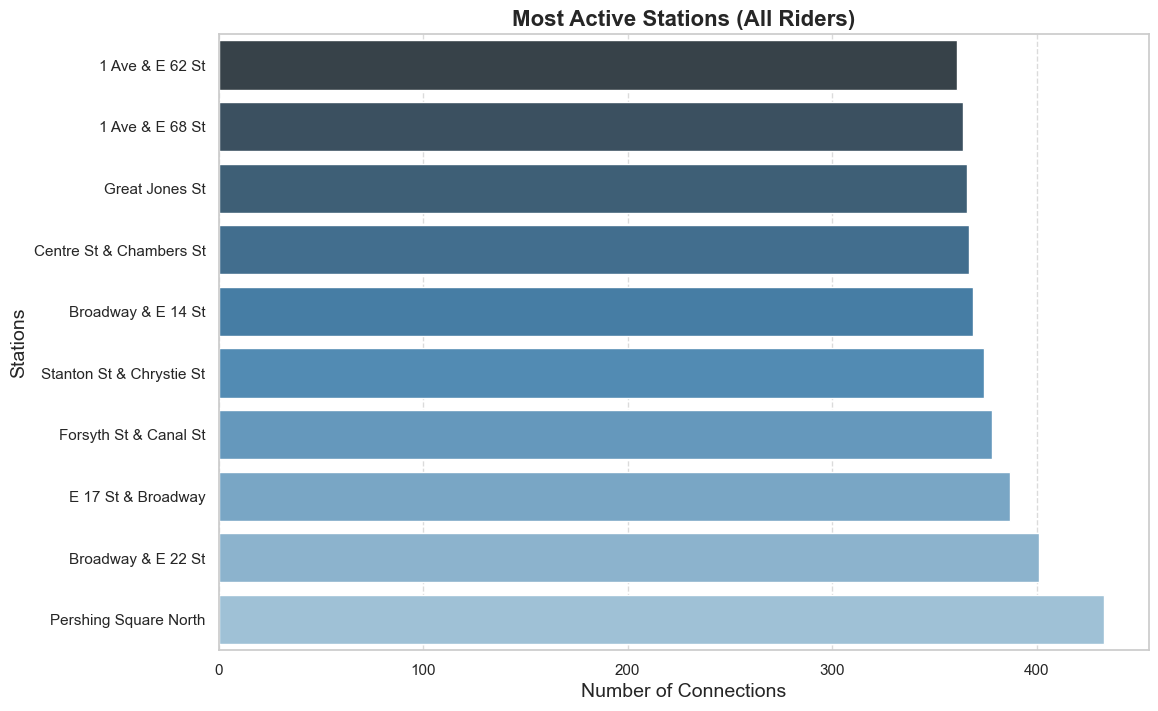

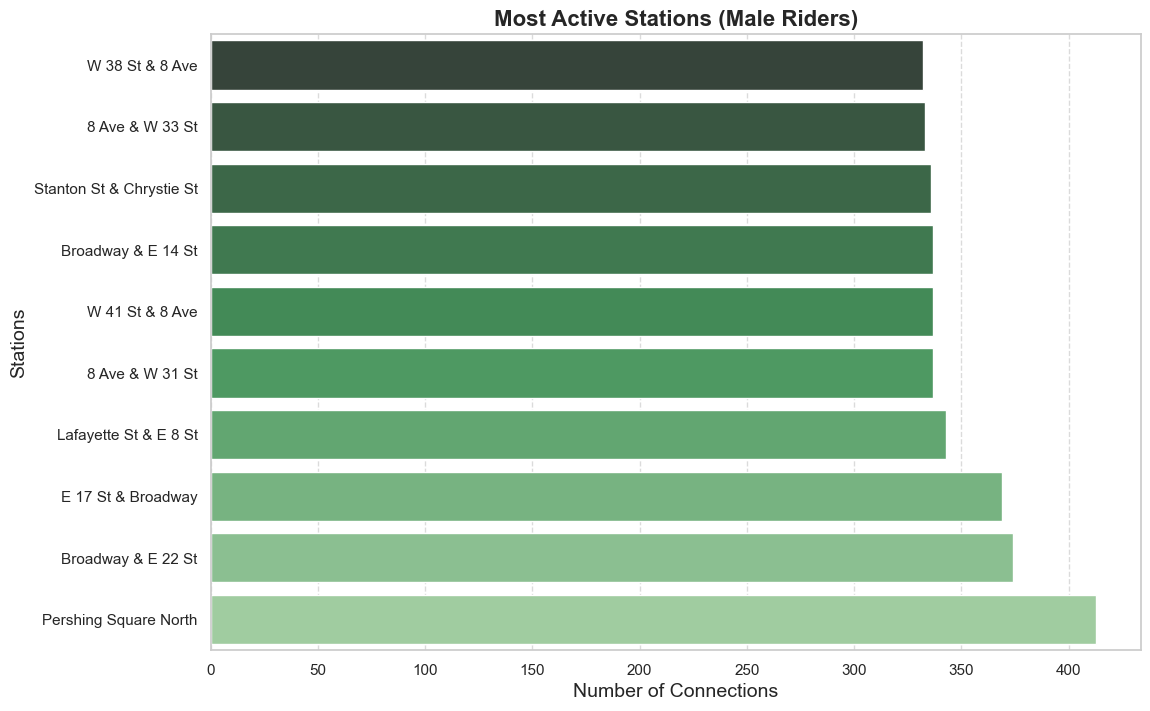

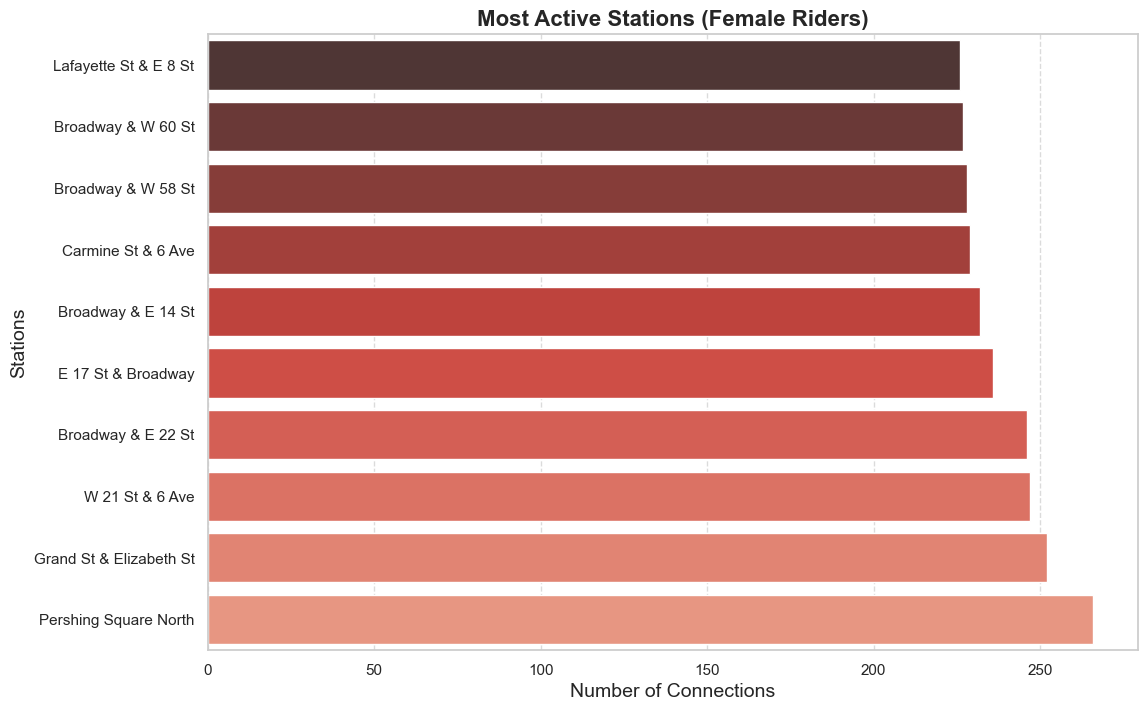

In [ ]:
def plot_most_active_stations(graph, node_names, title, palette):
    degrees = dict(graph.degree())
    sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]
    labels, values = zip(*[(node_names[n], d) for n, d in sorted_degrees])
    
    plt.figure(figsize=(12, 8))
    sns.set_theme(style="whitegrid")
    sns.barplot(x=list(values), y=list(labels), palette=palette, hue=list(labels), legend=False)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Number of Connections', fontsize=14)
    plt.ylabel('Stations', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


plot_most_active_stations(G, nodes, 'Most Active Stations (All Riders)', sns.color_palette("Blues_d", 10))
plot_most_active_stations(m_G, m_nodes, 'Most Active Stations (Male Riders)', sns.color_palette("Greens_d", 10))
plot_most_active_stations(f_G, f_nodes, 'Most Active Stations (Female Riders)', sns.color_palette("Reds_d", 10))


# Conclusion

# Final Insights Report: Citibike Network Analysis (September 2018)

## Overview
This analysis explores Citibike trip data for September 2018 to understand the network's characteristics, focusing on different rider demographics (all riders, male riders, and female riders). Key metrics include busiest stations, longest trips, most trips, central stations, and bottleneck nodes.

## Key Metrics and Insights

### Busiest Stations
- **All Riders:** Pershing Square North is the busiest station with 433 trips.
- **Male Riders:** Pershing Square North remains the busiest with 413 trips.
- **Female Riders:** Pershing Square North is again the busiest, though with fewer trips (266 trips).

The consistent dominance of Pershing Square North across all demographics indicates its critical role in the Citibike network, likely due to its central location and high connectivity.

### Longest Trips
- **All Riders:** Nassau St & Navy St to Hope St & Union Ave (325,167.48 minutes).
- **Male Riders:** Nassau St & Navy St to Hope St & Union Ave (325,167.48 minutes).
- **Female Riders:** Adelphi St & Myrtle Ave to NYCBS Depot - 3AV (73,698.82 minutes).

The extremely high duration values suggest potential data anomalies or issues in trip duration reporting for these trips.

### Most Trips Between Stations
- **All Riders:** Pershing Square North to Broadway & W 32 St (326 trips).
- **Male Riders:** Pershing Square North to Broadway & W 32 St (310 trips).
- **Female Riders:** Adelphi St & Myrtle Ave to Willoughby St & Fleet St (87 trips).

Pershing Square North to Broadway & W 32 St is a highly frequented route, especially among male riders, indicating a popular commuting path.

### Most Central Station
- **All Riders:** Pershing Square North with a closeness centrality of 0.69.

This suggests that Pershing Square North is not only a hub for high activity but also centrally located in terms of network connectivity.

### Bottleneck Node
- **All Riders:** 1 Ave & E 62 St with a betweenness centrality of 0.01.

The low betweenness centrality value suggests limited bottleneck effects, but 1 Ave & E 62 St still plays a notable role in the network flow.

## Visual Insights

### Most Active Stations (Female Riders)
The bar chart shows Pershing Square North as the most active station for female riders, followed by Grand St & Elizabeth St and W 21 St & 6 Ave.

### Most Active Stations (All Riders and Male Riders)
These charts highlight the prominence of Pershing Square North across all and male riders, with other stations like Broadway & E 22 St and E 17 St & Broadway also being significant.

### Trip Duration Distribution
The histograms show trip duration distributions for all, male, and female riders, indicating that most trips are relatively short, typically under 20 minutes.

### Degree Distribution
The degree distributions reveal the connectivity levels of stations, with a higher number of stations having moderate degrees of connectivity.

## Conclusion
The analysis highlights Pershing Square North as a critical hub in the Citibike network for all rider demographics. It underscores the importance of this station in terms of connectivity and activity. While there are some anomalies in trip duration data, the overall network shows a healthy distribution of trip durations and station connectivity. Further investigation into data anomalies and a deeper dive into geographical patterns could provide additional insights.
